In [1]:
# machine learning classification
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
import seaborn

from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('./data/zm_test.csv', index_col = 0)

In [3]:
df.head()

,1. open,2. high,3. low,4. close,5. volume,reportedDate,surprise,surprisePercentage,reported_Quarterly_EPS,estimated_Quarterly_EPS,reported_Annual_EPS
2019-04-18,65.00,66.000,60.321,62.0,25764659.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-22,61.00,68.900,59.940,65.7,9949738.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-23,66.87,74.169,65.550,69.0,6786513.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-24,71.40,71.500,63.160,63.2,4973529.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-25,64.74,66.850,62.600,65.0,3863275.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#use forward will to deal with null values 
df = df.ffill()


In [5]:
df.tail()

,1. open,2. high,3. low,4. close,5. volume,reportedDate,surprise,surprisePercentage,reported_Quarterly_EPS,estimated_Quarterly_EPS,reported_Annual_EPS
2021-01-11,344.98,349.96,336.8500,337.71,3360357.0,2020-11-30,0.2296,30.1946,0.99,0.7604,2.11
2021-01-12,333.20,358.90,331.1000,356.81,8890435.0,2020-11-30,0.2296,30.1946,0.99,0.7604,2.11
2021-01-13,360.00,384.23,348.6512,364.63,14056546.0,2020-11-30,0.2296,30.1946,0.99,0.7604,2.11
2021-01-14,371.00,384.95,370.5000,383.24,9310967.0,2020-11-30,0.2296,30.1946,0.99,0.7604,2.11
2021-01-15,397.71,404.44,382.0701,384.53,12799509.0,2020-11-30,0.2296,30.1946,0.99,0.7604,2.11


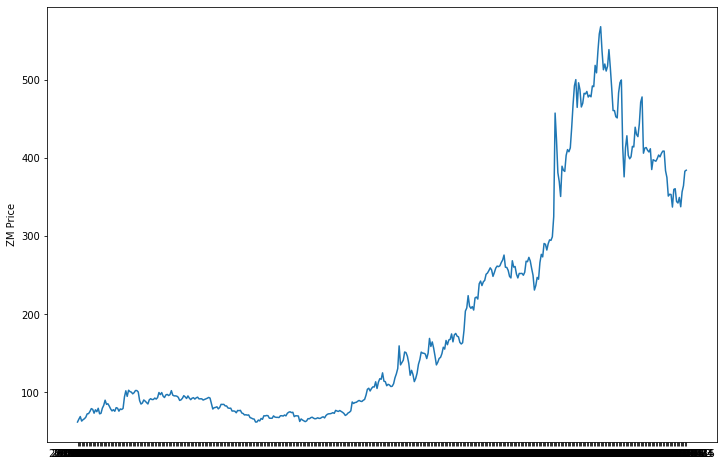

In [6]:
plt.figure(figsize=(12,8))
plt.plot(df['4. close'])
plt.ylabel('ZM Price');


In [7]:
#Buy - if next months price is 5% greater than current price we buy
#Hold - if next months price is betwe -5%-%5 we hold
#Sell - if next months prices is more than -5% from current price we sell



In [8]:
close = df[['4. close']]
close.head()

,4. close
2019-04-18,62.0
2019-04-22,65.7
2019-04-23,69.0
2019-04-24,63.2
2019-04-25,65.0


In [9]:
close.tail()

,4. close
2021-01-11,337.71
2021-01-12,356.81
2021-01-13,364.63
2021-01-14,383.24
2021-01-15,384.53


In [10]:
forecast = 30
close['prediction'] = close[['4. close']].shift(-forecast)
close.tail()

<ipython-input-10-e652708e2a36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close['prediction'] = close[['4. close']].shift(-forecast)


,4. close,prediction
2021-01-11,337.71,NaN
2021-01-12,356.81,NaN
2021-01-13,364.63,NaN
2021-01-14,383.24,NaN
2021-01-15,384.53,NaN


In [11]:
close.head()

,4. close,prediction
2019-04-18,62.0,75.90
2019-04-22,65.7,78.74
2019-04-23,69.0,78.04
2019-04-24,63.2,79.43
2019-04-25,65.0,94.05


In [12]:
X = np.array(close.drop(['prediction'], 1))
X = X[:-forecast]
X

array([[ 62.   ],
       [ 65.7  ],
       [ 69.   ],
       [ 63.2  ],
       [ 65.   ],
       [ 66.22 ],
       [ 68.17 ],
       [ 72.47 ],
       [ 72.76 ],
       [ 75.5  ],
       [ 79.18 ],
       [ 78.24 ],
       [ 73.33 ],
       [ 77.68 ],
       [ 75.21 ],
       [ 79.63 ],
       [ 72.54 ],
       [ 73.14 ],
       [ 79.76 ],
       [ 83.4  ],
       [ 89.98 ],
       [ 84.67 ],
       [ 85.44 ],
       [ 82.43 ],
       [ 78.76 ],
       [ 76.25 ],
       [ 77.77 ],
       [ 75.77 ],
       [ 80.42 ],
       [ 79.73 ],
       [ 75.9  ],
       [ 78.74 ],
       [ 78.04 ],
       [ 79.43 ],
       [ 94.05 ],
       [102.   ],
       [ 94.87 ],
       [102.77 ],
       [100.95 ],
       [100.29 ],
       [ 98.11 ],
       [ 99.64 ],
       [102.39 ],
       [102.3  ],
       [100.47 ],
       [ 89.41 ],
       [ 85.03 ],
       [ 86.33 ],
       [ 90.27 ],
       [ 88.79 ],
       [ 86.86 ],
       [ 85.13 ],
       [ 90.45 ],
       [ 91.88 ],
       [ 90.76 ],
       [ 9

In [13]:
y = np.array(close['prediction'])
y = y[:-forecast]
y

array([ 75.9  ,  78.74 ,  78.04 ,  79.43 ,  94.05 , 102.   ,  94.87 ,
       102.77 , 100.95 , 100.29 ,  98.11 ,  99.64 , 102.39 , 102.3  ,
       100.47 ,  89.41 ,  85.03 ,  86.33 ,  90.27 ,  88.79 ,  86.86 ,
        85.13 ,  90.45 ,  91.88 ,  90.76 ,  90.93 ,  92.72 ,  91.4  ,
        93.3  ,  99.8  ,  97.1  ,  99.73 ,  95.19 ,  93.38 ,  96.67 ,
        97.39 ,  95.94 ,  97.11 , 102.2  ,  96.47 ,  95.49 ,  95.51 ,
        95.1  ,  93.66 ,  89.69 ,  90.43 ,  92.45 ,  95.77 ,  94.2  ,
        92.16 ,  95.45 ,  92.65 ,  90.64 ,  92.53 ,  93.17 ,  91.41 ,
        93.01 ,  93.87 ,  91.63 ,  91.76 ,  91.73 ,  90.16 ,  90.87 ,
        91.67 ,  92.46 ,  93.53 ,  92.69 ,  85.41 ,  78.65 ,  80.35 ,
        80.71 ,  81.53 ,  78.85 ,  80.67 ,  84.64 ,  84.55 ,  84.62 ,
        82.63 ,  82.62 ,  80.02 ,  79.6  ,  79.75 ,  76.04 ,  76.2  ,
        75.81 ,  73.85 ,  76.83 ,  76.53 ,  76.99 ,  73.59 ,  72.86 ,
        71.01 ,  71.35 ,  70.8  ,  71.11 ,  67.69 ,  67.03 ,  66.08 ,
        65.77 ,  62.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
SVR = SVR(kernel = 'rbf', C=1e3, gamma =0.1)
SVR.fit(X_train, y_train)
SVR.score(X_test, y_test)

0.7811804262748074

In [16]:
X_forecast = np.array(close.drop(['prediction'], 1))[-forecast:]
X_forecast

array([[413.54],
       [410.01],
       [407.85],
       [412.  ],
       [385.36],
       [397.96],
       [397.01],
       [395.99],
       [399.43],
       [404.  ],
       [401.62],
       [406.01],
       [408.97],
       [409.  ],
       [383.88],
       [375.17],
       [351.39],
       [353.75],
       [353.4 ],
       [337.32],
       [359.98],
       [360.83],
       [344.41],
       [342.5 ],
       [349.61],
       [337.71],
       [356.81],
       [364.63],
       [383.24],
       [384.53]])

In [17]:
SVM_prediction = SVR.predict(X_forecast)
SVM_prediction

array([369.37867643, 581.86426057, 490.89997547, 454.82239007,
       524.39938391, 308.0182214 , 311.01219388, 313.41171632,
       307.88617333, 351.98308651, 337.2425702 , 370.40169496,
       566.41074083, 567.7733549 , 512.44657107, 366.25945392,
       315.08648011, 315.08648011, 315.08648011, 315.08654671,
       315.08648011, 315.08648011, 315.08648011, 315.08648011,
       315.08648011, 315.0865054 , 315.08648011, 315.0865865 ,
       509.70088498, 521.08193537])

<ipython-input-20-54d1974b205a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices


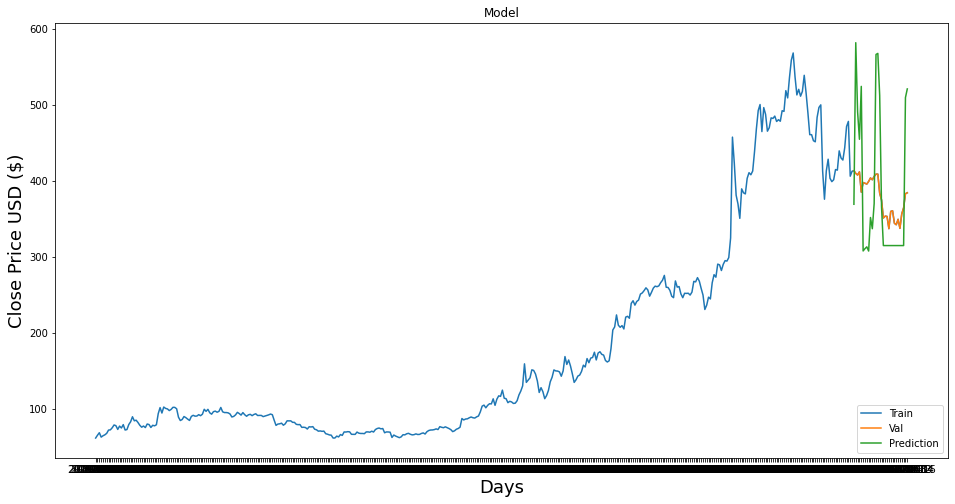

In [20]:
#Visualize the data
predictions = SVM_prediction
#Plot the data
valid =  close[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(close['4. close'])
plt.plot(valid[['4. close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()